In [1]:
# importing all the required Libraries
import glob
import json
import csv
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import calendar

In [3]:
file=glob.glob(r'C:\Users\NargesPC\Desktop\code\NARRE-master\data\music\Digital_Music_5.json')
# Reading a multiple json files from a single json file 'ReviewSample.json'.
review=[]
with open(file[0]) as data_file:
    data=data_file.read()
    for i in data.split('\n'):
        review.append(i)
        
# Making a list of Tuples containg all the data of json files.
reviewDataframe=[]
for x in review:
    try:
        jdata=json.loads(x)
        reviewDataframe.append((jdata['reviewerID'],jdata['asin'],jdata['reviewerName'],jdata['helpful'][0],jdata['helpful'][1],jdata['reviewText'],jdata['overall'],jdata['summary'],jdata['unixReviewTime'],jdata['reviewTime'])) 
    except:
        pass
    
# Creating a dataframe using the list of Tuples got in the previous step.
dataset=pd.DataFrame(reviewDataframe,columns=['Reviewer_ID','Asin','Reviewer_Name','helpful_UpVote','Total_Votes','Review_Text','Rating','Summary','Unix_Review_Time','Review_Time'])

In [6]:
dataset=pd.read_csv('Digital_Music_5.csv')

dataset['Review_Time']= pd.to_datetime(dataset['Review_Time'])

dataset['Month']=dataset['Review_Time'].dt.month

dataset['Year']=dataset['Review_Time'].dt.year

# NUMBER OF REVIEWS OVER THE YEARS.

In [7]:
Yearly=dataset.groupby(['Year'])['Reviewer_ID'].count().reset_index()

Yearly=Yearly.rename(columns={'Reviewer_ID': 'Number_Of_Reviews'})

Yearly.head(20)

Yearly.to_csv('Year_VS_Reviews.csv')

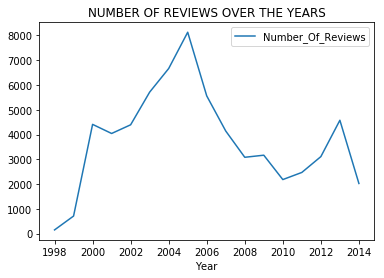

In [11]:
Yearly.plot(x="Year",y="Number_Of_Reviews",kind="line",title="NUMBER OF REVIEWS OVER THE YEARS")
plt.show()

# NUMBER OF REVIEWS BY MONTH (1999-2014)

In [14]:
Monthly=dataset.groupby(['Month'])['Reviewer_ID'].count().reset_index()

# Replacing digits of 'Month' column in 'Monthly' dataframe with words using 'Calendar' library
Monthly['Month'] = Monthly['Month'].apply(lambda x: calendar.month_name[x])
Monthly=Monthly.rename(columns={'Reviewer_ID':'Number_of_Reviews'})

Monthly.head(12)

In [17]:
Monthly.to_csv('Month_VS_Reviews.csv')

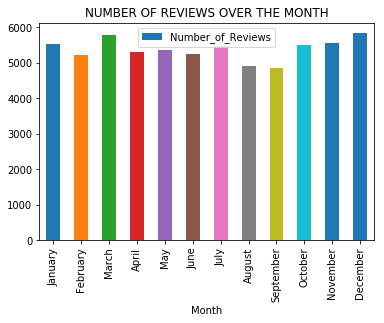

In [18]:
Monthly.plot(x="Month",y="Number_of_Reviews",kind="bar",title="NUMBER OF REVIEWS OVER THE MONTH")
plt.show()

# DISTRIBUTION OF OVERALL RATING FOR 'CLOTHING SHOES AND JEWELERY' CATEGORY REVIEWS ON AMAZON

In [20]:
Overall_Rating=dataset.groupby(['Rating'])['Reviewer_ID'].count().reset_index()

Overall_Rating=Overall_Rating.rename(columns={'Reviewer_ID':'Number_of_Reviews'})
Overall_Rating

In [22]:
Overall_Rating.to_csv('Rating_VS_Reviews.csv')

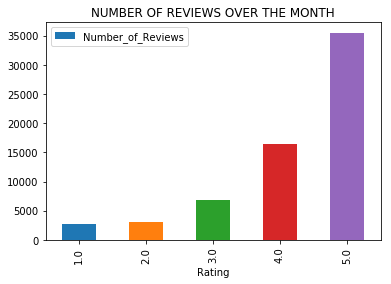

In [23]:
Overall_Rating.plot(x="Rating",y="Number_of_Reviews",kind="bar",title="NUMBER OF REVIEWS OVER THE MONTH")
plt.show()

# AVERAGE OVERALL RATINGS OVER THE YEARS (1999-2014)

In [28]:
Yearly_Avg_Rating=dataset.groupby(['Year'])['Rating'].mean().reset_index()

Yearly_Avg_Rating['Moving_Average']=Yearly_Avg_Rating['Rating'].rolling(window=3).mean()

Yearly_Avg_Rating.head(12)

In [31]:
Yearly_Avg_Rating.to_csv('Yearly_Avg_Rating.csv')

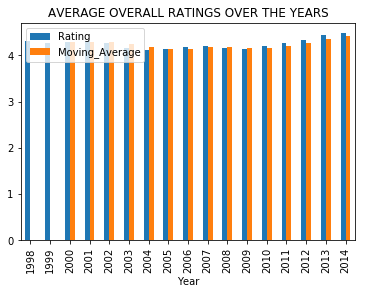

In [32]:
Yearly_Avg_Rating.plot(x="Year",y=["Rating","Moving_Average"],kind="bar",title="AVERAGE OVERALL RATINGS OVER THE YEARS")
plt.show()

# DISTRIBUTION OF HELPFULNESS OF 'CLOTHING SHOES AND JEWELLERY' REVIEWS ON AMAZON

In [33]:
Helpfulness=dataset[['helpful_UpVote','Total_Votes']]
Helpfulness['helpful_UpVote']=Helpfulness['helpful_UpVote'].astype(float)
Helpfulness['Total_Votes']=Helpfulness['Total_Votes'].astype(float)

Helpfulness['Percentage']=(Helpfulness['helpful_UpVote']/Helpfulness['Total_Votes'])*100
Helpfulness=Helpfulness.fillna(0)

result_Helpfulness=Helpfulness.groupby(pd.cut(Helpfulness.Percentage,np.arange(0, 101, 10))).count()
result_Helpfulness=result_Helpfulness.rename(columns={'Percentage':'Count'})
result_Helpfulness=result_Helpfulness.reset_index()

result_Helpfulness.head(11)

In [38]:
result_Helpfulness[["Percentage","Count"]].to_csv('Helpfuness_Percentage_Distribution.csv')

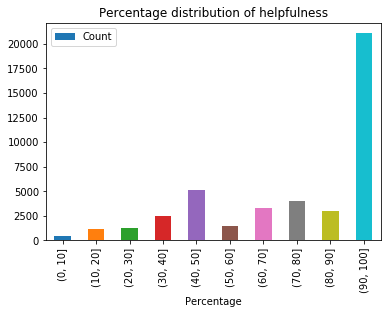

In [39]:
result_Helpfulness.plot(x="Percentage",y="Count",kind="bar",title="Percentage distribution of helpfulness")
plt.show()

# DISTRIBUTUTION OF LENGTH OF REVIEWS ON AMAZON

In [42]:
Review_Length=dataset[['Reviewer_ID','Reviewer_Name','Review_Text']]

len(Review_Length['Review_Text'][0])

Review_Length['Review_Text']=Review_Length['Review_Text'].fillna("")

# Word count
Review_Length['Word_Length']=Review_Length['Review_Text'].apply(lambda x: len(x.split()))

# character count
Review_Length['Character_Length']=Review_Length['Review_Text'].apply(lambda x: len(x))

Review_Length.head()

In [60]:
Char_Review_Length=Review_Length.groupby(pd.cut(Review_Length.Character_Length,np.arange(0, 1501, 100))).count()
Char_Review_Length=Char_Review_Length.rename(columns={'Character_Length':'Count'})
result_Char_Review_Length=Char_Review_Length.reset_index()

Word_Review_Length=Review_Length.groupby(pd.cut(Review_Length.Word_Length,np.arange(0, 801, 100))).count()
Word_Review_Length=Word_Review_Length.rename(columns={'Word_Length':'Count'})
result_Word_Review_Length=Word_Review_Length.reset_index()

In [61]:
result_Char_Review_Length[["Character_Length","Count"]].to_csv('Character_Length_Distribution.csv')
result_Word_Review_Length[["Word_Length","Count"]].to_csv('Word_Length_Distribution.csv')

In [62]:
result_Char_Review_Length[["Character_Length","Count"]].head()

,Character_Length,Count
0,"(0, 100]",1155
1,"(100, 200]",5939
2,"(200, 300]",4992
3,"(300, 400]",4650
4,"(400, 500]",4354


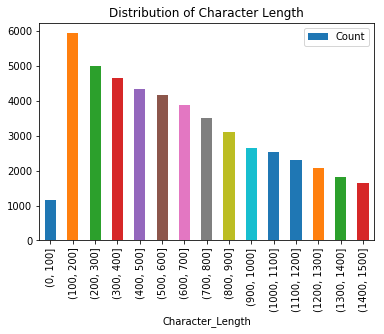

In [63]:
result_Char_Review_Length.plot(x="Character_Length",y="Count",kind="bar",title="Distribution of Character Length")
plt.show()

In [64]:
result_Word_Review_Length[["Word_Length","Count"]].head()

,Word_Length,Count
0,"(0, 100]",23776
1,"(100, 200]",18294
2,"(200, 300]",9794
3,"(300, 400]",5279
4,"(400, 500]",2993


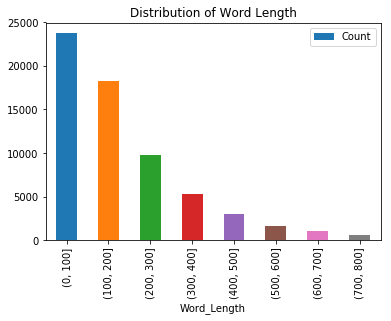

In [65]:
result_Word_Review_Length.plot(x="Word_Length",y="Count",kind="bar",title="Distribution of Word Length")
plt.show()

# DISTRIBUTION OF PRICES OF 'CLOTHING SHOES AND JEWELERY' ON AMAZON

In [44]:
file2=glob.glob('../Data/Tested_Data/ProductSample.json')

product=[]
with open(file2[0]) as data_file:
    data=data_file.read()
    for i in data.split('\n'):
        product.append(i)

productDataframe=[]
for x in product:
    try:
        y=x.replace("'",'"')
        jdata=json.loads(y)
        productDataframe.append((jdata['asin'],jdata['price'])) 
    except:
        pass

Product_dataset=pd.DataFrame(productDataframe,columns=['Asin','Price'])

In [48]:
price10=Product_dataset[(Product_dataset.Price > 0) & (Product_dataset.Price <= 10)]
price50=Product_dataset[(Product_dataset.Price > 10) & (Product_dataset.Price <= 50)]
price100=Product_dataset[(Product_dataset.Price > 50) & (Product_dataset.Price <= 100)]
price200=Product_dataset[(Product_dataset.Price > 100) & (Product_dataset.Price <= 200)]
price500=Product_dataset[(Product_dataset.Price > 200) & (Product_dataset.Price <= 500)]
price1000=Product_dataset[(Product_dataset.Price > 500) & (Product_dataset.Price <= 1000)]

In [49]:
result=[]
result.append(('[0-10]',price10.shape[0]))
result.append(('[11-50]',price50.shape[0]))
result.append(('[51-100]',price100.shape[0]))
result.append(('[101-200]',price200.shape[0]))
result.append(('[201-500]',price500.shape[0]))
result.append(('[501-1000]',price1000.shape[0]))

In [50]:
result=pd.DataFrame(result,columns=["Range",'Count'])

In [51]:
result.to_csv('../Analysis/Analysis_2/Price_Distribution.csv')

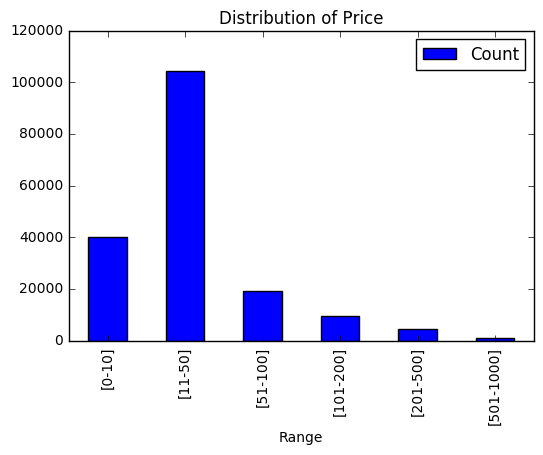

In [52]:
result.plot(x="Range",y="Count",kind="bar",title="Distribution of Price")
plt.show()

# DISTRIBUTION OF OVERALL RATING OF PRODUCTS

In [66]:
AvgRatingProd=dataset.groupby('Asin')['Rating'].mean().reset_index()

In [67]:
result_AvgRatingProd=AvgRatingProd.groupby(pd.cut(AvgRatingProd.Rating,np.arange(0, 5.1, 1))).count()
result_AvgRatingProd=result_AvgRatingProd.rename(columns={'Rating':'Count'})
result_AvgRatingProd=result_AvgRatingProd.reset_index()

In [68]:
result_AvgRatingProd[['Rating','Count']]

,Rating,Count
0,"(0.0, 1.0]",0
1,"(1.0, 2.0]",10
2,"(2.0, 3.0]",94
3,"(3.0, 4.0]",941
4,"(4.0, 5.0]",2523


In [69]:
result_AvgRatingProd[['Rating','Count']].to_csv('Rating_Distribution.csv')

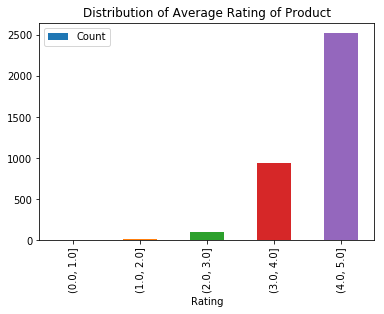

In [70]:
result_AvgRatingProd.plot(x="Rating",y="Count",kind="bar",title="Distribution of Average Rating of Product")
plt.show()

# PRODUCT PRICE V/S OVERALL RATING OF REVIEWS WRITTEN BY USERS

In [59]:
Price_vs_Rating=pd.merge(AvgRatingProd, Product_dataset, on='Asin', how='inner')

In [60]:
Price_vs_Rating.head()

,Asin,Rating,Price
0,0000031887,4.224576,6.79
1,0000037214,1.000000,6.99
2,0123456479,4.474359,64.98
3,0641997078,5.000000,47.99
4,0681256036,4.000000,17.59


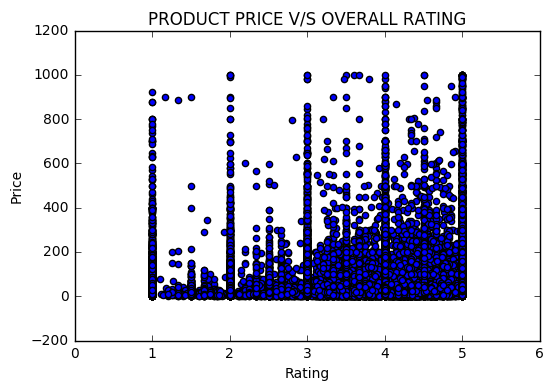

In [63]:
Price_vs_Rating.plot(x="Rating",y="Price",kind="scatter",title="PRODUCT PRICE V/S OVERALL RATING")
plt.show()

# AVERAGE REVIEW LENGTH V/S PRODUCT PRICE

In [64]:
Avg_Review_Length=dataset[['Reviewer_ID','Asin','Reviewer_Name','Review_Text']]

# Word count
Avg_Review_Length['Word_Length']=Avg_Review_Length['Review_Text'].apply(lambda x: len(x.split()))

# character count
Avg_Review_Length['Character_Length']=Avg_Review_Length['Review_Text'].apply(lambda x: len(x))

Avg_Review_Length2=Avg_Review_Length.groupby('Asin')['Character_Length','Word_Length'].mean().reset_index()

Review_Length_vs_Price=pd.merge(Avg_Review_Length2, Product_dataset, on='Asin', how='inner')

Review_Length_vs_Price.head()

Scatter plot for product price v/s average review length

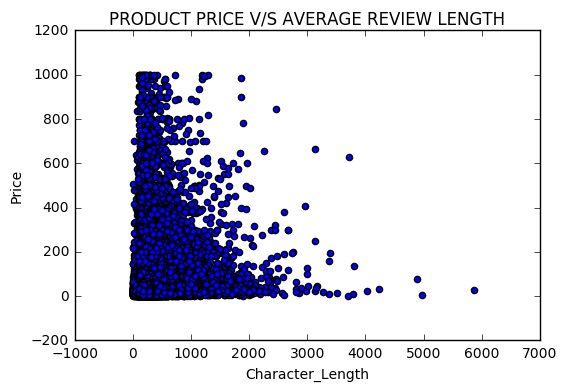

In [70]:
Review_Length_vs_Price.plot(x="Character_Length",y="Price",kind="scatter",title="PRODUCT PRICE V/S AVERAGE REVIEW LENGTH")
plt.show()

# DISTRIBUTION OF NUMBER OF REVIEWS WRITTEN BY EACH USER

In [92]:
User_Review=dataset[['Reviewer_ID','Asin']]

User_Review2=User_Review.groupby(['Reviewer_ID']).count().reset_index()

User_Review3=User_Review2.sort_values('Asin',ascending=False)

User_Review3=User_Review3.rename(columns={'Asin':'No_of_Reviews'})

User_Review4=User_Review3.groupby('No_of_Reviews')['Reviewer_ID'].count().reset_index()
User_Review4=User_Review4.rename(columns={'Reviewer_ID':'Count'})

User_Review4=User_Review4.groupby(pd.cut(User_Review4.No_of_Reviews,np.arange(0, 200, 5))).sum()
User_Review4=User_Review4.rename(columns={'No_of_Reviews':'x'})
User_Review4=User_Review4.reset_index()

User_Review4[['No_of_Reviews','Count']].to_csv('DISTRIBUTION OF NUMBER OF REVIEWS.csv')

User_Review4[['No_of_Reviews','Count']].head(30)

Bar Chart Plot for NUMBER OF REVIEWS WRITTEN BY EACH USER

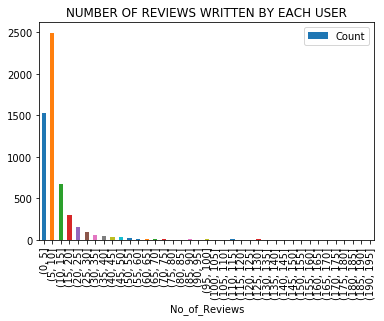

In [100]:
User_Review4.plot(x="No_of_Reviews",y="Count",kind="bar",title="NUMBER OF REVIEWS WRITTEN BY EACH USER")
plt.show()

# DISTRIBUTION OF AVERAGE RATINGS WRITTEN BY USERS

In [101]:
User_No_Rating=dataset[['Reviewer_ID','Rating']]

User_No_Rating2=User_No_Rating.groupby(['Reviewer_ID'])['Rating'].mean().reset_index()

User_No_Rating3=User_No_Rating2.groupby('Rating')['Reviewer_ID'].count().reset_index()
User_No_Rating3=User_No_Rating3.rename(columns={'Reviewer_ID':'Count'})

User_No_Rating3.head()

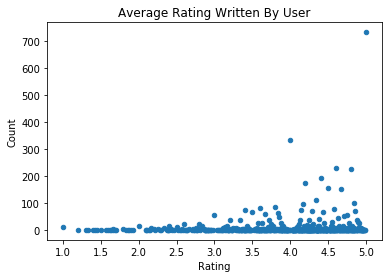

In [105]:
User_No_Rating3.plot(x="Rating",y="Count",kind="scatter",title="Average Rating Written By User")
plt.show()